In [1]:
import numpy as np
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from sklearn.cluster import KMeans

file_path = '/home/andres/University/uhi/data/Sentinel-2/MSI/L2A/2024/06/16/S2B_MSIL2A_20240616T105619_N0510_R094_T30TXM_20240616T123533.SAFE/GRANULE/L2A_T30TXM_A038015_20240616T105828/IMG_DATA/30TXM_20240616CompleteTile_masked.tif'

# Open the file
with rasterio.open(file_path) as dataset:
    # Read band 1
    band1 = dataset.read(1)  # Change the number to read a different band if needed
    no_data_value = dataset.nodata  # Get the no-data value for the band

/tmp/ipykernel_192408/2350755537.py:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("plasma").copy()
  cmap.set_bad(color='none')  # Set the color for masked values to transparent


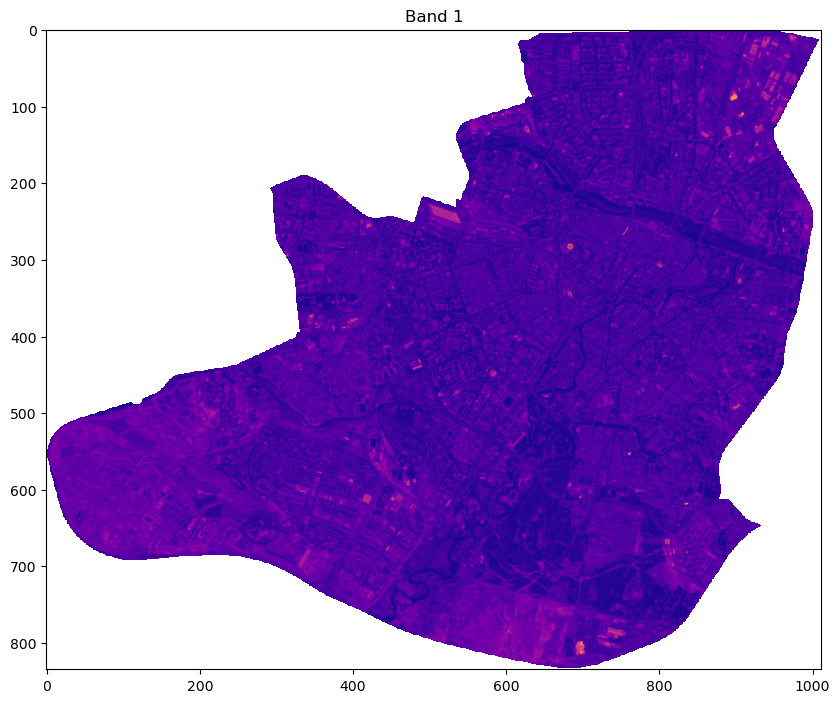

<AxesSubplot:title={'center':'Band 1'}>

In [2]:
# Mask the no-data values
band1 = np.ma.masked_equal(band1, no_data_value)

# Plot the band using matplotlib
plt.figure(figsize=(10, 10))
plt.title('Band 1')
cmap = plt.cm.plasma
cmap.set_bad(color='none')  # Set the color for masked values to transparent
show(band1, cmap=cmap)

### Clustering

In [3]:
# Flatten the band to prepare for clustering
data = band1.flatten().reshape(-1, 1)  # Reshape to a column vector

# Perform K-means clustering (adjust number of clusters as needed)
num_clusters = 4  # Adjust the number of clusters here
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data)

/home/andres/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


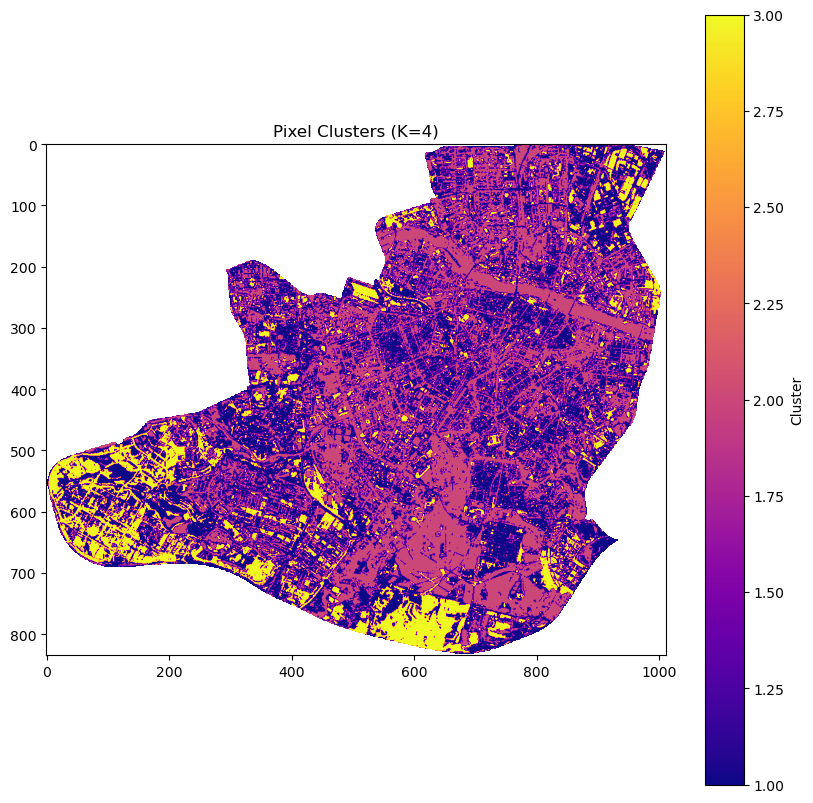

In [4]:
cluster_labels = kmeans.labels_.reshape(band1.shape)

# Mask clusters where original band had no-data
cluster_labels = np.ma.masked_where(band1 == no_data_value, cluster_labels)

# Plot the clustered image
plt.figure(figsize=(10, 10))
plt.imshow(cluster_labels, cmap='plasma')
plt.colorbar(label='Cluster')
plt.title(f'Pixel Clusters (K={num_clusters})')
plt.show()